"""
take DE lists filtered by gene in signature (citation freq>3 or different)
merge ito a table. Compare different lists, check by boxplots, PCA etc.
"""

import packages, make function for getting line items
activate matplotlib notebook option (or not, it feels clumsy in both cases)
NOTE: for logFCs change the block down to items=[x.rstrip().split("\t") for x  in lines[2:]], for PCA items=[x.rstrip().split("\t") for x  in lines[1:]]

In [1]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import axes3d
#activate matplotlib notebook option
%matplotlib notebook

#function for reading files
def getitems(fil):
    sfil=open(fil, "r"); lines=sfil.readlines(); sfil.close()
    items=[x.rstrip().split("\t") for x  in lines[2:]]
    return(items)
def getitems2(fil):
    sfil=open(fil, "r"); lines=sfil.readlines(); sfil.close()
    items=[x.rstrip().split(",") for x  in lines[2:]]
    return(items)

get aging list from file and make a AS subset

In [2]:
#load list and make signature
items=getitems("/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/01_Aging_List_REAN.txt")
ASgenes=[x[0] for x in items if int(x[1])>3]
print("len items, len AS", len(items), len(ASgenes))

len items, len AS 5442 221


load files for merging and cross check

In [3]:
#load individual files and collect data
mdir="/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/rean/AL_filtered/00_formated/"
# files=["Bersenev_GSE39553n_DE_YOn.csv","Chambers_GSE6503_YOn.csv",
#     "Flach_GSE48893_YOn.csv","Grover_GSE70657_DE_OY.csv",
#     "Kirshner_GSE87631_DE_OY.csv","Kowalczyk_GSE59114_DE_OY.csv",
#     "Lazare_DE_YO.csv","Mann_GSE1004426_DE_OY.csv",
#       "Maryanovich_GSE109546_DE_YO.csv","Norddahl_GSE27686_DE_YOn.csv",
#       "Sun_GSE47817_DE_YO.csv","Wahlestedt_GSE44923_DE_YOn.csv"]

# files=["Beerman_2013.txt","Chambers_2007.txt","Flach_2014.txt","Grover_2016.txt",
#     "Kirshner_2017.txt","Kowalczyk_2015.txt","Noda_2009.txt","Quere_2014.txt",
#     "Rossi_2005.txt","Sun_2014.txt","Wahlestedt_2013.txt"]

files=["Bersenev_AL.csv","Chambers_AL.csv","Flach_AL.csv",
       "Grover_AL.csv","Kirshner_AL.csv","Kowalczyk_AL.csv",
       "Lazare_AL.csv","Mann_AL.csv","Maryanovich_AL.csv",
       "Norddahl_AL.csv","Sun_AL.csv","Wahlestedt_AL.csv"]


logFCs, Gnames=[],[]
for file in files:
    myitems=getitems2(mdir+file)
    #for pval instead logFC change to myfreqs=[float(x[2])for x in myitems]
    #print(myitems)
    mygenes=[x[0] for x in myitems]
    #print(mygenes)
    myfreqs=[float(x[2])for x in myitems]
    #collect logFCs, redundant gene names in arrays!
    freqs=[]
    #loop through signature gene names
    for i in range(len(ASgenes)):
        fre=[]
        #loop through current file 
        for j in range(len(mygenes)):
            if ASgenes[i]==mygenes[j]:
                fre.append(myfreqs[j])
        freqs.append(fre)
    #adjust to single value per gene
    new_freqs=[]
    for fre in freqs:
        if len(fre)>1:
            new_freqs.append(sum(fre)/len(fre))
        if len(fre)==1:
            new_freqs.append(fre[0])
        if len(fre)==0:
            #if nothing found, add 0 or NA
            new_freqs.append(0)
    logFCs.append(new_freqs)
print("len freqs", len(logFCs))

len freqs 12


now we can check number of found genes per set

In [4]:
for i in range(len(files)):
    found=[x for x in logFCs[i] if x>0]
    print(files[i], len(found))

Bersenev_AL.csv 219
Chambers_AL.csv 189
Flach_AL.csv 215
Grover_AL.csv 116
Kirshner_AL.csv 81
Kowalczyk_AL.csv 53
Lazare_AL.csv 197
Mann_AL.csv 72
Maryanovich_AL.csv 197
Norddahl_AL.csv 216
Sun_AL.csv 198
Wahlestedt_AL.csv 216


We can also check found genes per platform. Our first 5 lists are microarrays, the next 4 are single-cell data, and the last 3 are bulk RNAseq.

In [5]:
per_gene=np.transpose(logFCs)
rare_names=[]
print(len(ASgenes), len(per_gene))
for i in range(len(ASgenes)):
    arr=sum(per_gene[i][0:5])
    sce=sum(per_gene[i][5:9])
    sec=sum(per_gene[i][9:])
    if min([arr,sec])==0:
        print(ASgenes[i])#,arr,sce,sec, sep="\t")
        rare_names.append(ASgenes[i])
    

221 221



Note, there are redundancies in microarray data, we collect 
average logFC values for multiple data

In [6]:
#checking for synonyms
syns=getitems("/Users/leonid_bystrykh/Documents/Articles&Presentations/2020/AgingSign/data/mart_Mm_genes_synonyms.txt")
for sy in syns:
    for ra in rare_names:
        if ra in sy:
            print(ra, sy)
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/leonid_bystrykh/Documents/Articles&Presentations/2020/AgingSign/data/mart_Mm_genes_synonyms.txt'

In [7]:
def save_to(file_out):
    #file_out="/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/03_AS_table.csv"
    f_out=open(file_out, "w")
    f_out.writelines("Genes,"+ str(ASgenes)[1:-1].replace("'","")+"\n")
    for i in range(len(files)):
        f_out.writelines(files[i]+","+str(logFCs[i])[1:-1]+"\n")
    f_out.close()
def save_transposed():
    file_out="/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/TEST.csv"
    table=np.transpose(logFCs)
 #   print("table", table)
    f_out=open(file_out, "w")
    f_out.writelines("Genes,"+ str(files)[1:-1].replace("'","")+"\n")
    for i in range(len(ASgenes)):
        f_out.writelines(ASgenes[i]+","+str(list(table[i]))[1:-1]+"\n")
    f_out.close()
save_transposed()
print("saved")

saved


try boxplot

<IPython.core.display.Javascript object>


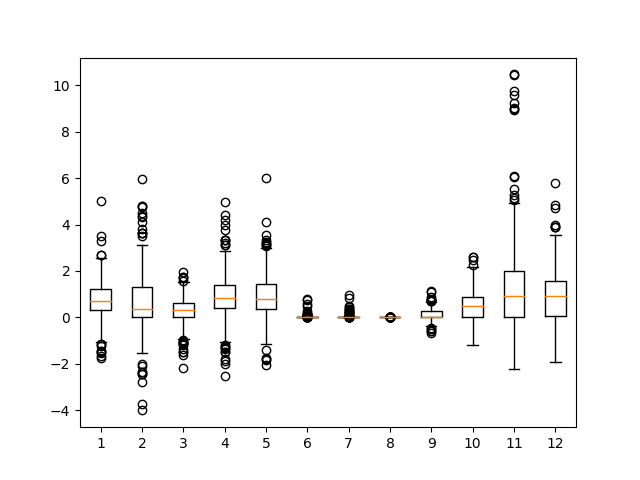

{'whiskers': [<matplotlib.lines.Line2D at 0x117533c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1175623d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10d987750>,
 'medians': [<matplotlib.lines.Line2D at 0x117562e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11754a350>,
 'means': []}

In [5]:
plt.boxplot(logFCs)

try PCA plot

<IPython.core.display.Javascript object>


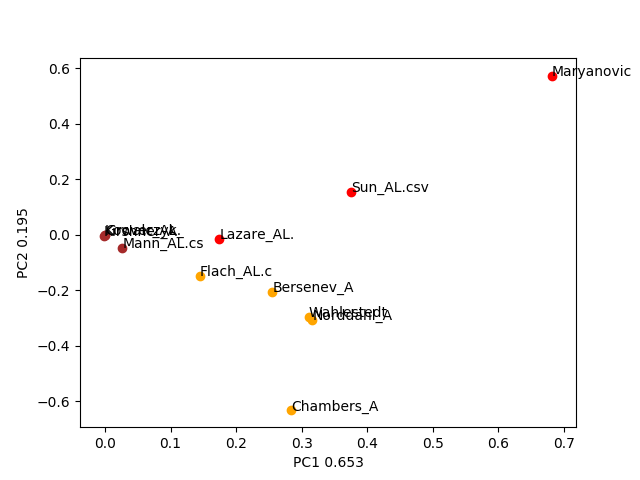

[[5.0010008487, 3.5091365035, 3.2736876585, 2.7016208648, 2.694994289, 2.5646221613, 2.5450903648, 2.3802924819, 2.2536011791, 2.231535968, 2.1428738385, 2.0128704187, 1.9839574767, 1.972984103, 1.9726565009, 1.9332861995, 1.9294713563, 1.8682448217, 1.8587191274, 1.8049427123, 1.7955118414, 1.7420037973, 1.6867433334, 1.6795845975, -1.6684281996, 1.6462690766, 1.6456271075, 1.6424776077, 1.6302952059, 1.6213759505, 1.6148852799, 1.607073666, 1.5837487917, 1.5684858493, 1.5240129539, -1.5082036618, -1.5031169058, 1.502226385, 1.4773619246, -1.4257750693, 1.4220217427, 1.4058185673, 1.4038694688, 1.3963292557, 1.3908937212, 1.3889313724, 1.3217589339, 1.3157208228, 1.3100872998, 1.3045755932, 1.2709371667, 1.2705966495, 1.2605053759, 1.25983476, 1.2539522356, 1.2463915496, -1.2399182144, 1.2309814252, 1.2292780296, 1.2203189988, 1.1951184841, 1.191653799, 1.1638452527, 1.1613916587, 1.1540817263, -1.1332542013, -1.1214607369, 1.1091491177, 1.0993081483, 1.0928497254, 1.0701596498, 1.061

Text(0, 0.5, 'PC2 0.195')

In [8]:
from sklearn.decomposition import PCA
fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')

X = np.array(np.transpose(logFCs))
pca = PCA(n_components=3)
pca.fit(X)
pc1=pca.components_[0]
print("length PC", len(pc1))
pc2=pca.components_[1]
pc3=pca.components_[2]
colorz=["orange","orange","orange","orange","orange","brown","brown","brown","brown","red","red","red"]
print("explained", pca.explained_variance_ratio_)

for i in range(len(pc1)): #plot each point + it's index as text above
    ax.scatter(pc1[i],pc2[i],color=colorz[i])
    ax.text(pc1[i],pc2[i],  files[i][:10])
ax.set_xlabel('PC1 '+str(round(pca.explained_variance_ratio_[0],3)))
ax.set_ylabel('PC2 '+str(round(pca.explained_variance_ratio_[1],3)))


now try 3D

<IPython.core.display.Javascript object>


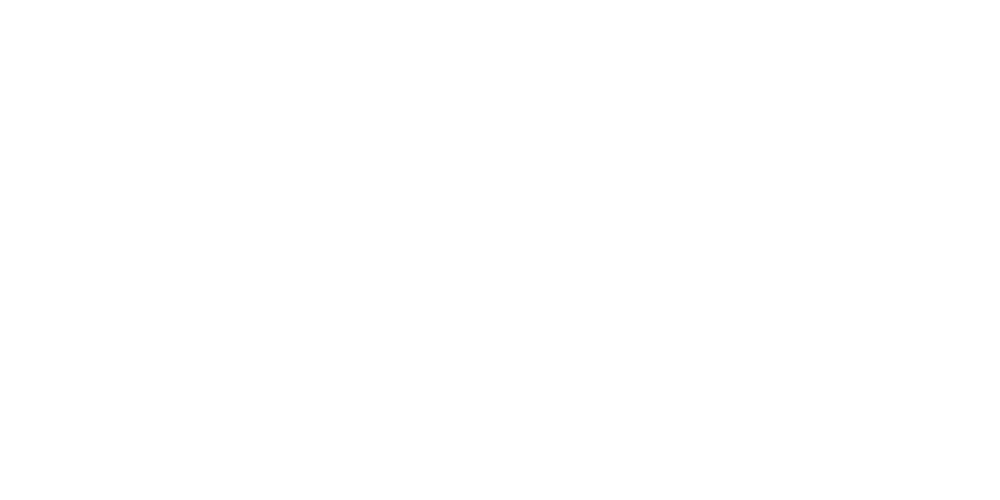

<IPython.core.display.Javascript object>


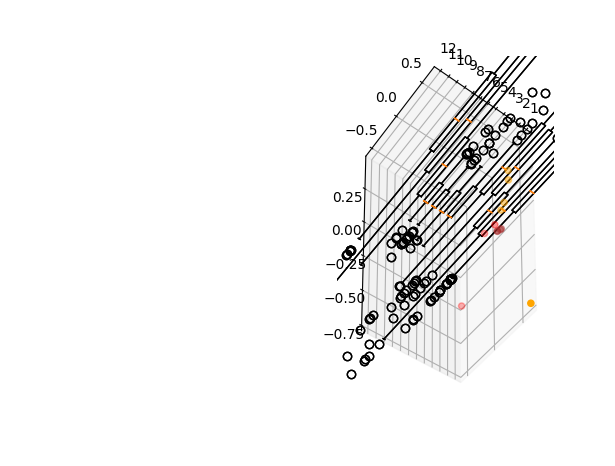

[[ 0.23694036  0.27461942  0.12813809  0.29721448  0.29913361  0.03141683
   0.02446643  0.03383647  0.02314547  0.17303753  0.70721726  0.37528952]
 [ 0.21055345  0.64100693  0.13519191  0.2982575   0.30231109  0.12332695
   0.05097155  0.10533221  0.05000508  0.02572579 -0.54226775 -0.14153383]
 [ 0.21520492 -0.70536052  0.19563181  0.41885849  0.34396467  0.06181081
   0.07397253  0.06249262  0.07785359  0.13015976 -0.26666699  0.12967486]]


In [20]:

plt.figure(figsize=(10,5))
fig = plt.figure()
ax = fig.add_subplot(122, projection='3d')
ax.scatter(pc1,pc2,pc3, c=colorz)
#plt.show()
print(pca.components_)
#for i in range(len(pc1)): #plot each point + it's index as text above
#    ax.scatter(pc1[i],pc2[i],pc3[i],color=colorz[i])
#    ax.text(pc1[i],pc2[i],pc3[i],  files[i][:10])
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
#plt.show()